Reading data from Classification_SampleID.csv...
Data preview:
                                          Unnamed: 0 Sample ID Unnamed: 2  \
0                                     Classification       ST1        ST2   
1                      aminocoumarin resistance gene         2          2   
2                     aminoglycoside resistance gene         1          1   
3  aminoglycoside resistance gene,antibiotic inac...         3          1   
4                       antibiotic activation enzyme         1          1   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        ST3        ST4        ST5        ST6        ST7        ST8   
1          2          2          2          2          2          2   
2          1          1          1          1          1          1   
3          1          3          1          1          1          1   
4          1          1          1          1          1          1   

  Unnamed: 9  ... Unnamed: 24 Unnamed: 25 Unnam

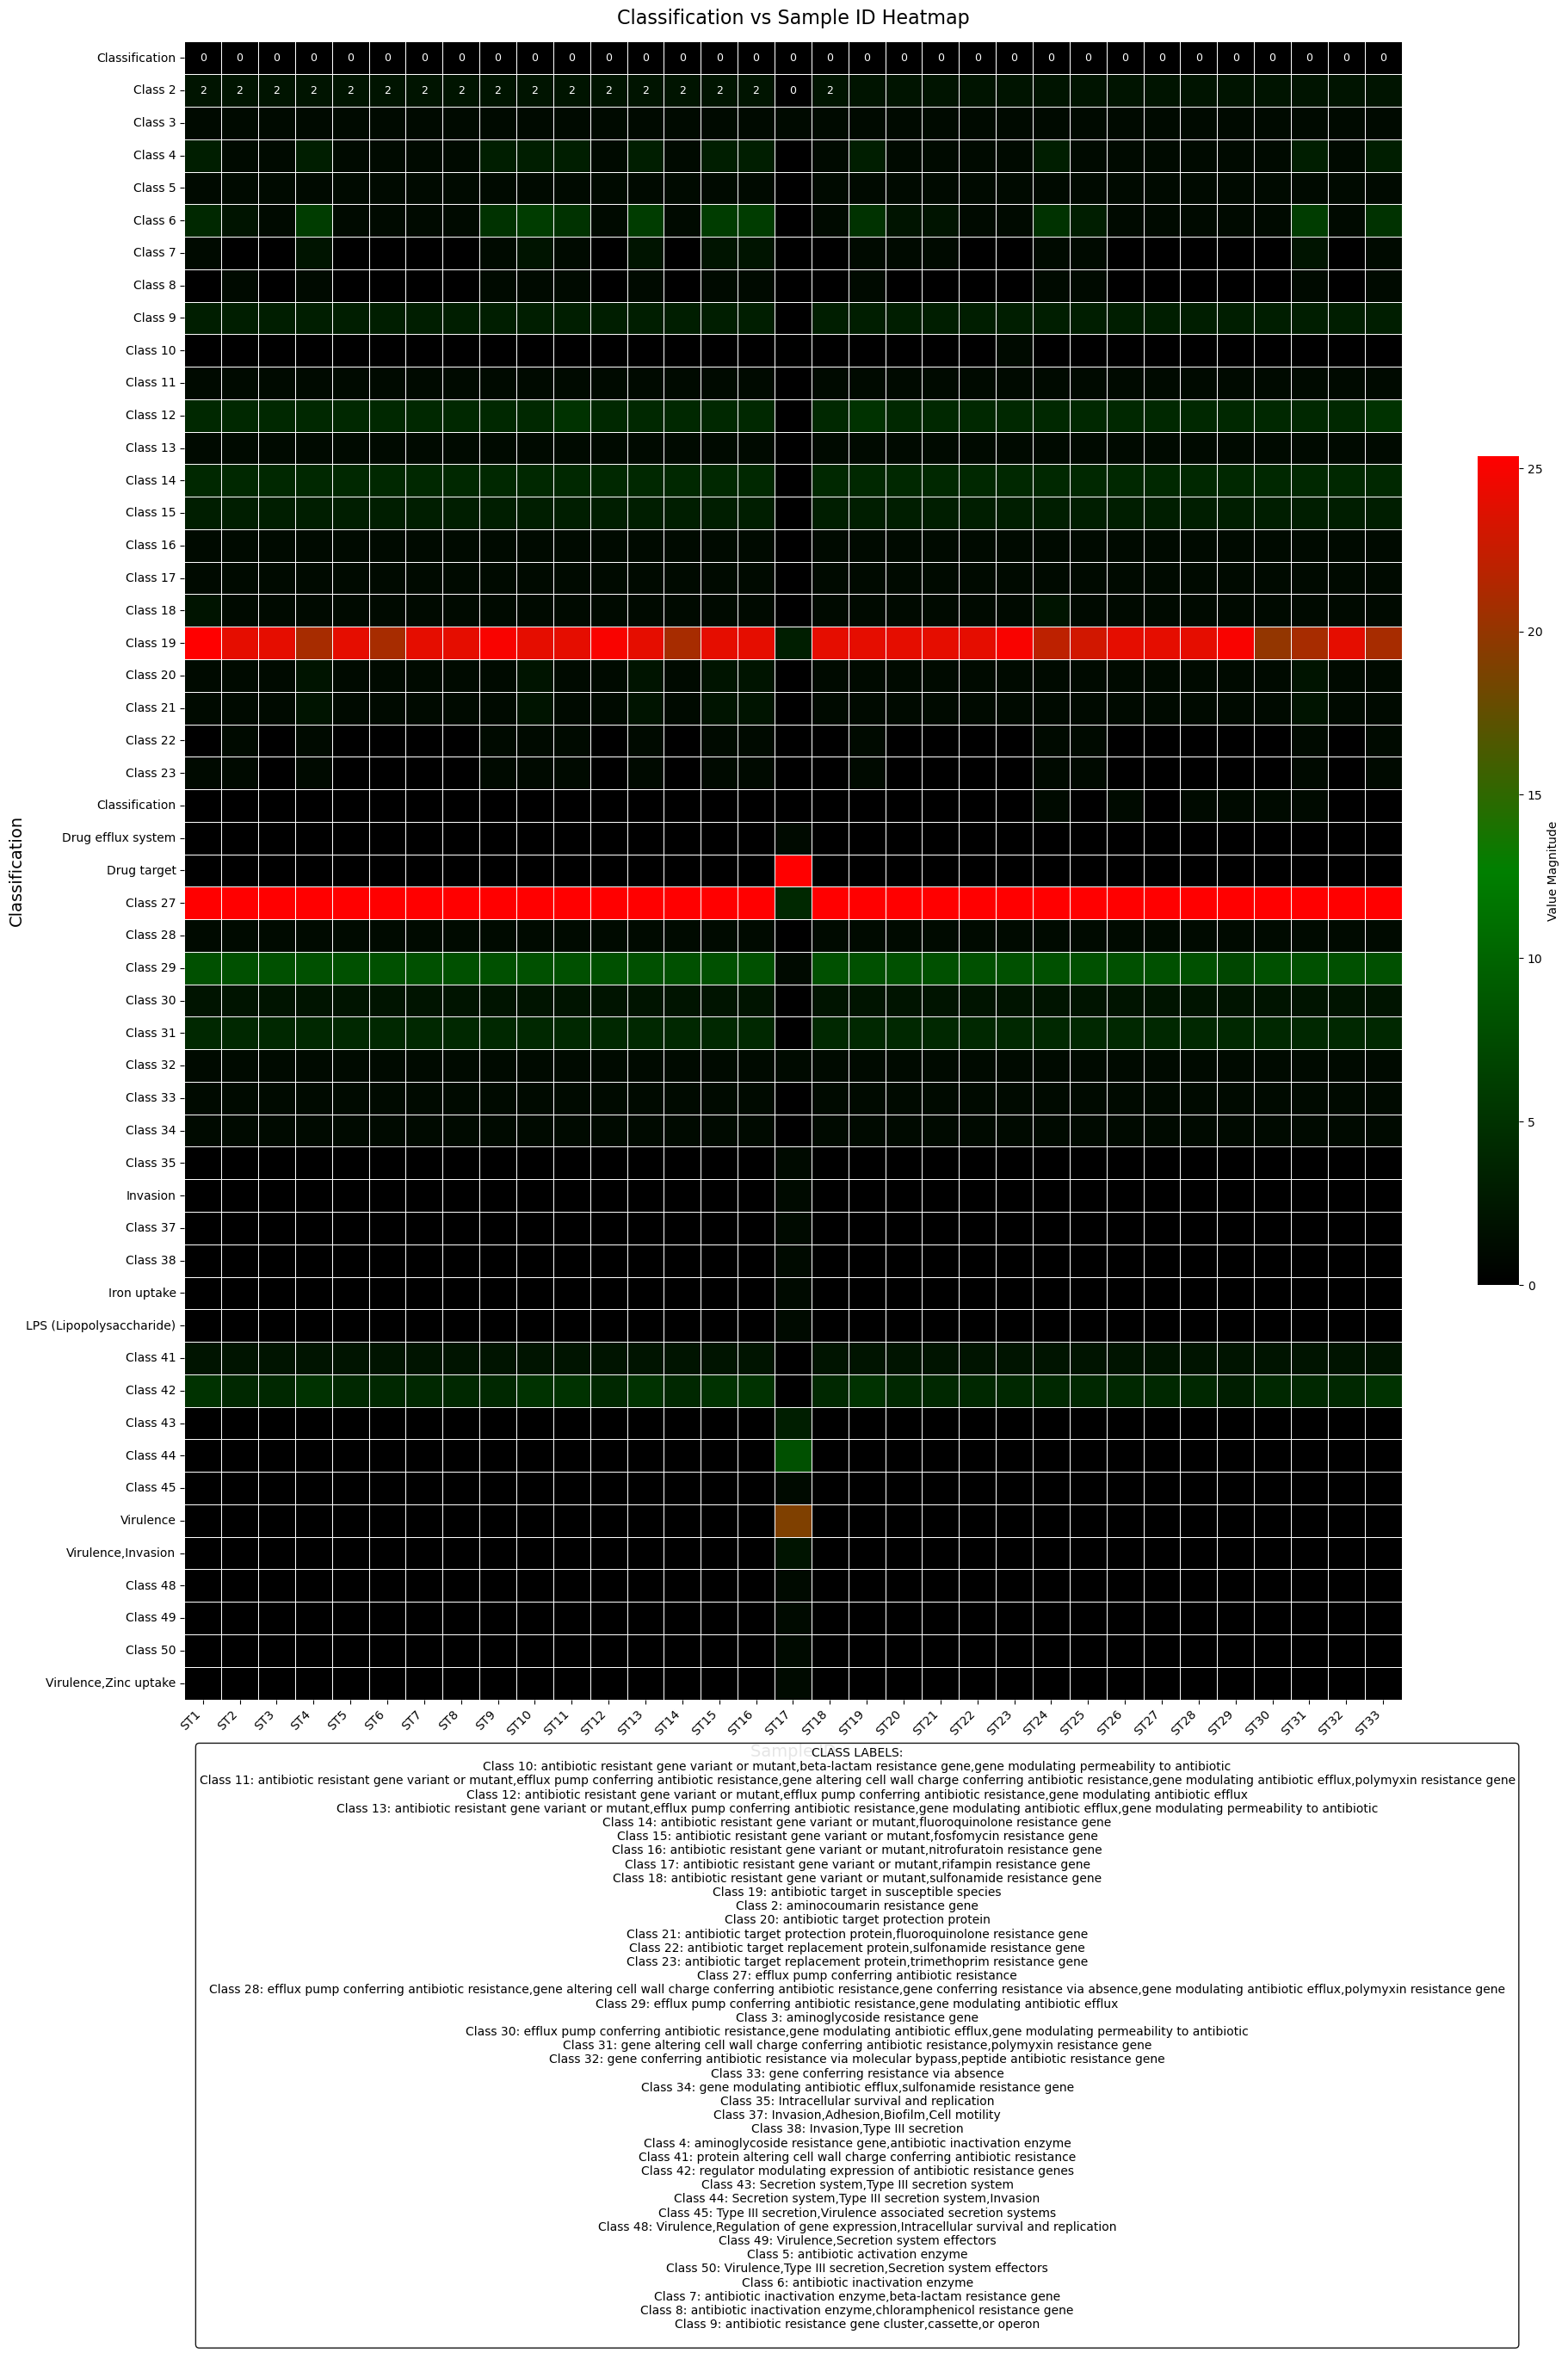

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
input_file = "Classification_SampleID.csv"
output_heatmap = "Classification_SampleID_heatmap.png"

# Data acquisition and preprocessing
print(f"Reading data from {input_file}...")
data = pd.read_csv(input_file)

# Data structure identification and processing
print("Data preview:")
print(data.head())

# Handle potential column structure issues
if 'Unnamed: 0' in data.columns:
    # Rename first column to a meaningful name
    data = data.rename(columns={'Unnamed: 0': 'Classification'})
    
    # If second column is Sample ID, we'll use it for structuring
    if 'Sample ID' in data.columns:
        # Set Classification as index
        data = data.set_index('Classification')
    else:
        # Handle alternative structures
        first_col_name = data.columns[0]
        data = data.set_index(first_col_name)

# Rename columns to follow ST1 to ST33 pattern
sample_columns = data.columns
st_labels = [f"ST{i+1}" for i in range(len(sample_columns))]
column_mapping = dict(zip(sample_columns, st_labels))
data = data.rename(columns=column_mapping)

# Create a mapping to preserve original column names for reference
original_column_mapping = dict(zip(st_labels, sample_columns))

# Convert all data to numeric format
print("Converting data to numeric format...")
for col in data.columns:
    # Skip the first column if it's the index
    if col != data.index.name:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill NaN values with 0
data = data.fillna(0)

# Create label mappings for long names
row_label_mapping = {}
for idx, label in enumerate(data.index):
    if len(str(label)) > 25:  # Threshold for truncation
        shortened = f"Class {idx+1}"  # Numeric identifier
        row_label_mapping[shortened] = str(label)
        data.rename(index={label: shortened}, inplace=True)

print(f"Created {len(row_label_mapping)} row label mappings and standardized column labels to ST1-ST{len(sample_columns)}")

# Figure dimensioning with optimization for data volume
fig_width = max(20, data.shape[1] * 0.5)
fig_height = max(14, data.shape[0] * 0.4)

# Create the heatmap visualization
print("\nGenerating heatmap visualization...")
plt.figure(figsize=(fig_width, fig_height))

# Custom color gradient
cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
    "custom", ["black", "green", "red"], N=256
)

# Generate the heatmap
heatmap = sns.heatmap(
    data,
    cmap=cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='g',
    annot_kws={"size": 9},
    robust=True,
    cbar_kws={"shrink": 0.5, "label": "Value Magnitude"}
)

# Typography configuration
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Title and labels
plt.title("Classification vs Sample ID Heatmap", fontsize=16, pad=15)
plt.xlabel('Sample ID', fontsize=14, labelpad=5)
plt.ylabel('Classification', fontsize=14, labelpad=1)

# Apply tight layout first
plt.tight_layout(pad=1.0)

# Add legend for truncated labels and original column names
if row_label_mapping or original_column_mapping:
    legend_text = ""
    if row_label_mapping:
        legend_text += "CLASS LABELS:\n"
        for short, full in sorted(row_label_mapping.items()):
            legend_text += f"{short}: {full}\n"
    
    # Calculate more compact legend positioning
    # Reduced bottom margin significantly
    bottom_margin = 0.03  # Minimized space
    
    # Adjust subplot position
    plt.subplots_adjust(bottom=bottom_margin)
    
    # Position legend closer to the plot with minimal vertical gap
    plt.figtext(0.5, 0.003, legend_text, ha='center', va='top', fontsize=10,
                bbox={"facecolor":"white", "alpha":0.9, "pad":3, "boxstyle":"round,pad=0.3"})

# Save the heatmap
plt.savefig(output_heatmap, dpi=300, bbox_inches='tight', pad_inches=0.1)  # Reduced padding
print(f"Heatmap saved to {output_heatmap} with resolution 300 DPI")

# Generate auxiliary legend file for reference
with open('classification_label_reference.txt', 'w') as f:
    f.write("CLASSIFICATION SAMPLE ID LABEL REFERENCE\n")
    f.write("=======================================\n\n")
    if row_label_mapping:
        f.write("CLASS LABELS:\n")
        for short, full in sorted(row_label_mapping.items()):
            f.write(f"{short}: {full}\n")
    
    f.write("\nSAMPLE ID LABELS:\n")
    for st_label, original in sorted(original_column_mapping.items()):
        f.write(f"{st_label}: {original}\n")

print("Label reference file generated: classification_label_reference.txt")
print("\nHeatmap generation complete.")

Reading data from Classification_SampleID.csv...
Data preview:
                                          Unnamed: 0 Sample ID Unnamed: 2  \
0                                     Classification       ST1        ST2   
1                      aminocoumarin resistance gene         2          2   
2                     aminoglycoside resistance gene         1          1   
3  aminoglycoside resistance gene,antibiotic inac...         3          1   
4                       antibiotic activation enzyme         1          1   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        ST3        ST4        ST5        ST6        ST7        ST8   
1          2          2          2          2          2          2   
2          1          1          1          1          1          1   
3          1          3          1          1          1          1   
4          1          1          1          1          1          1   

  Unnamed: 9  ... Unnamed: 24 Unnamed: 25 Unnam

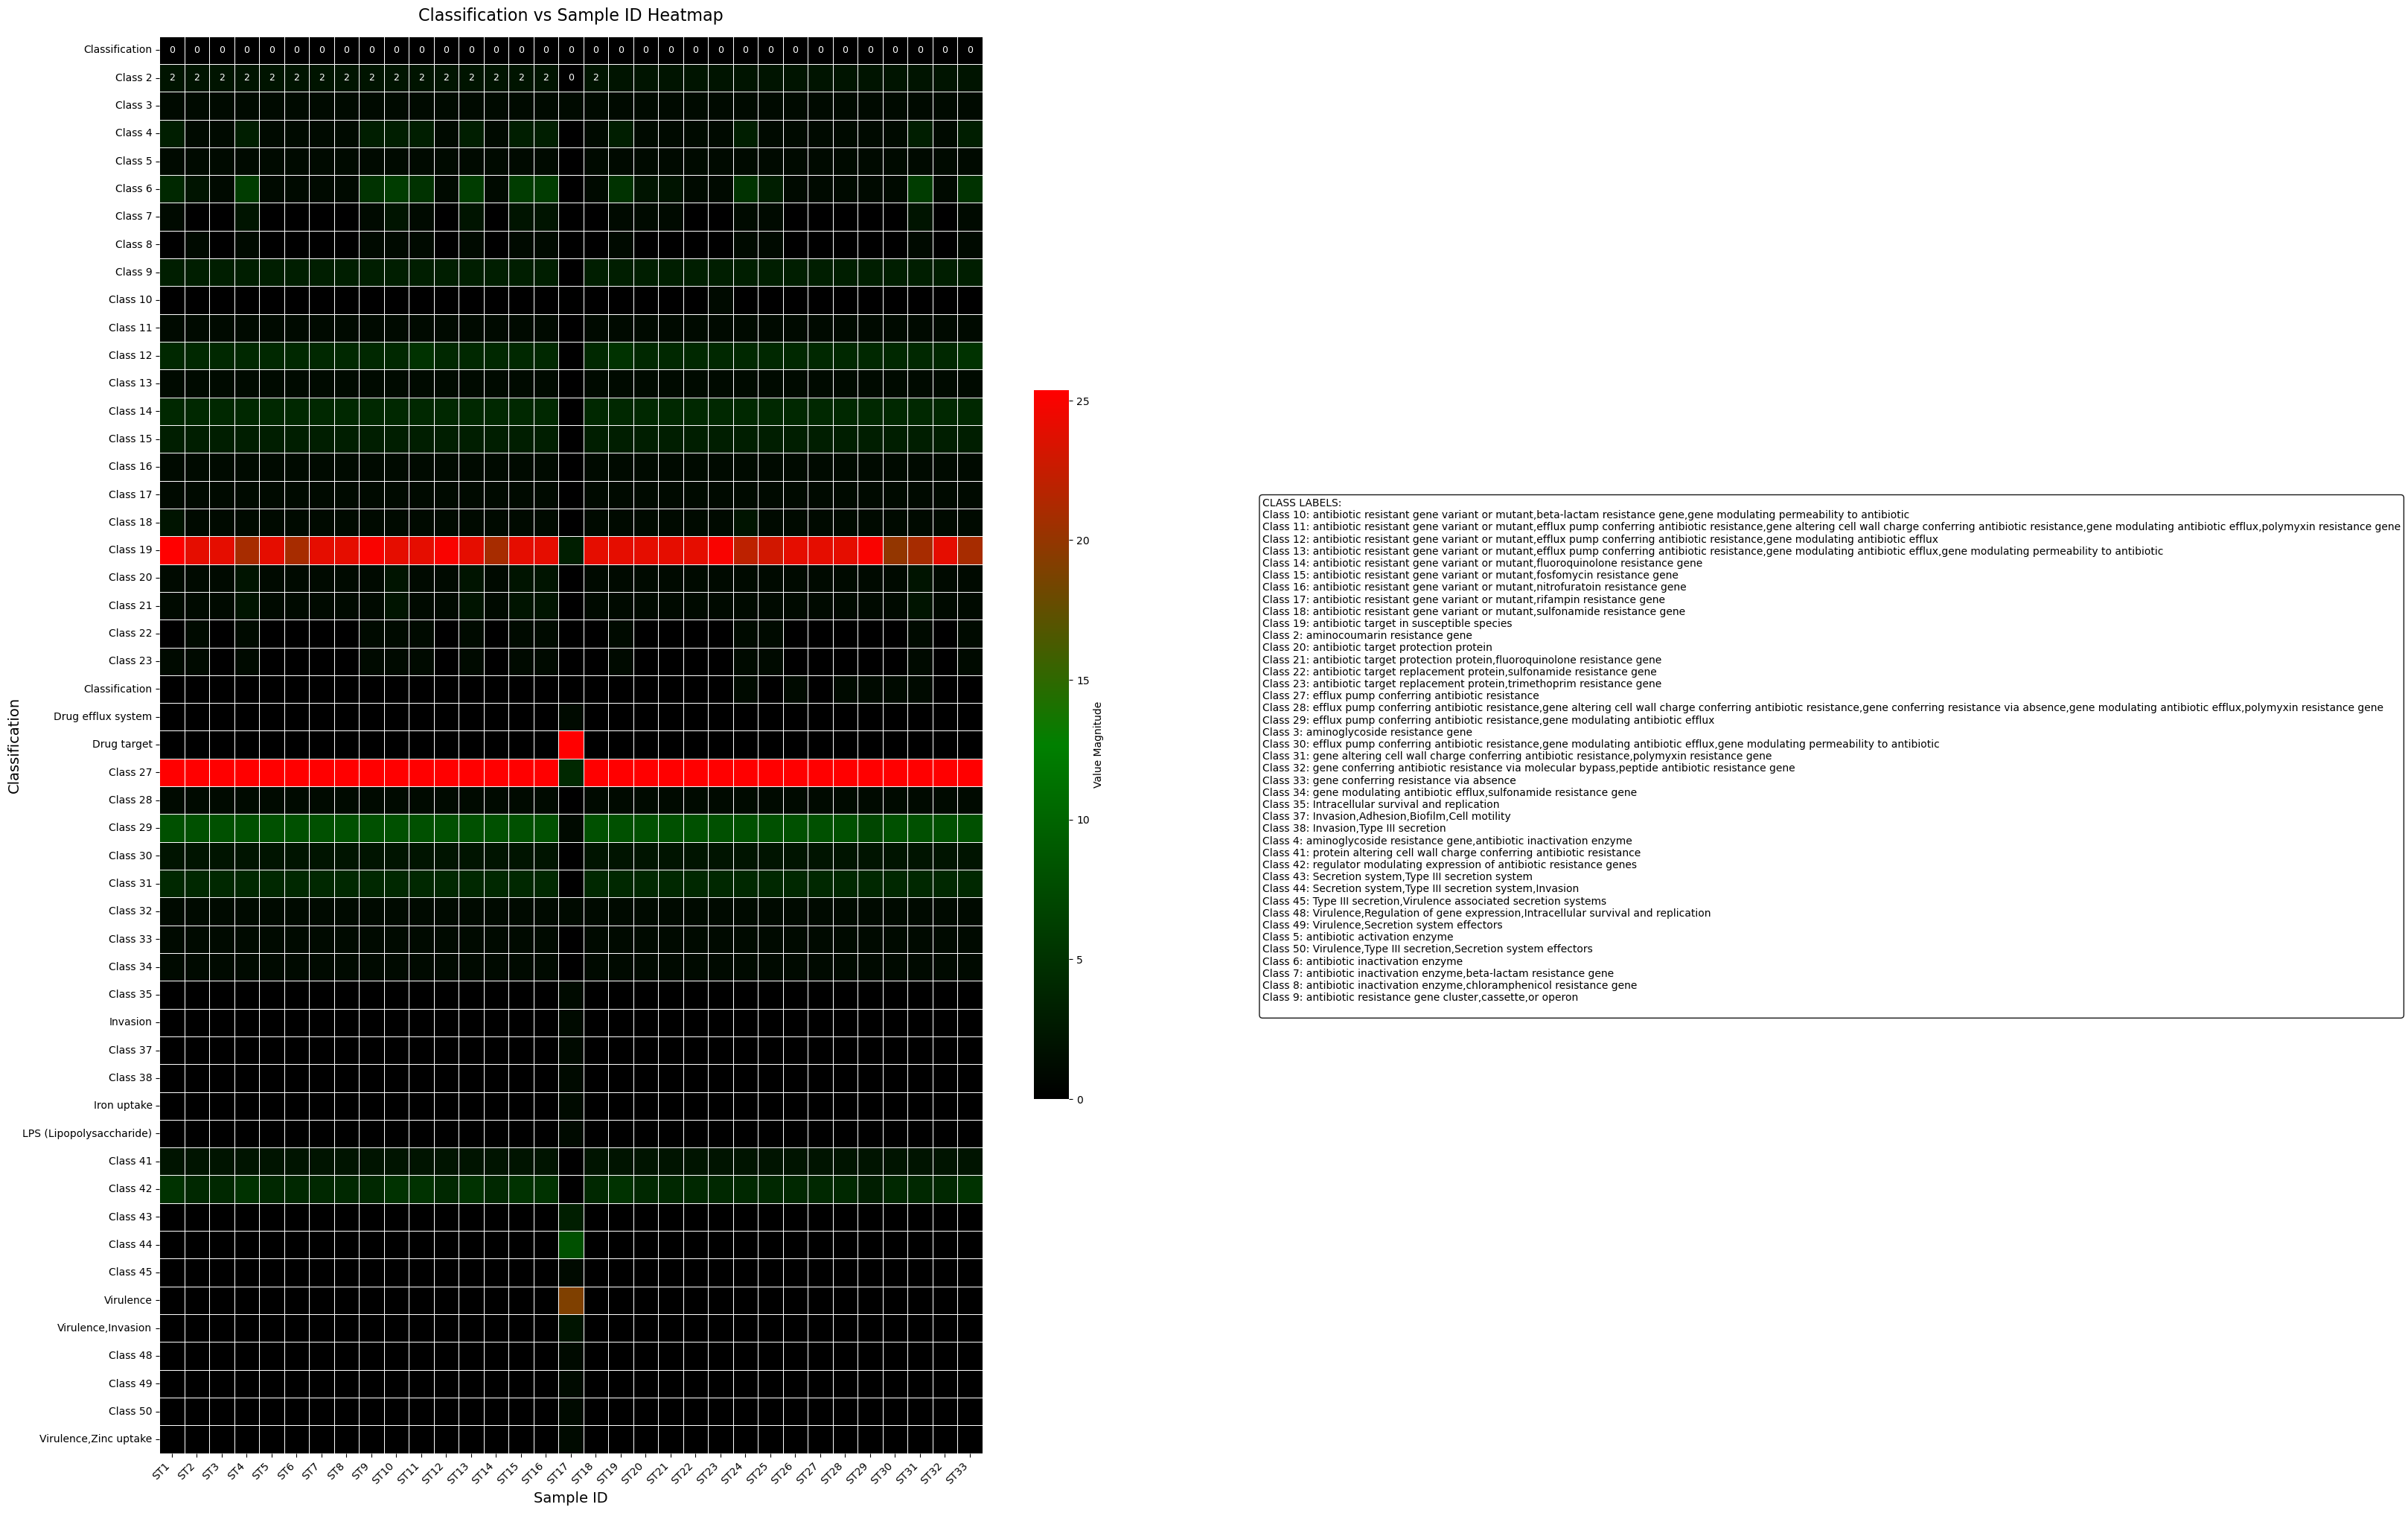

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
input_file = "Classification_SampleID.csv"
output_heatmap = "Classification_SampleID_heatmap.png"

# Data acquisition and preprocessing
print(f"Reading data from {input_file}...")
data = pd.read_csv(input_file)

# Data structure identification and processing
print("Data preview:")
print(data.head())

# Handle potential column structure issues
if 'Unnamed: 0' in data.columns:
    # Rename first column to a meaningful name
    data = data.rename(columns={'Unnamed: 0': 'Classification'})
    
    # If second column is Sample ID, we'll use it for structuring
    if 'Sample ID' in data.columns:
        # Set Classification as index
        data = data.set_index('Classification')
    else:
        # Handle alternative structures
        first_col_name = data.columns[0]
        data = data.set_index(first_col_name)

# Rename columns to follow ST1 to ST33 pattern
sample_columns = data.columns
st_labels = [f"ST{i+1}" for i in range(len(sample_columns))]
column_mapping = dict(zip(sample_columns, st_labels))
data = data.rename(columns=column_mapping)

# Create a mapping to preserve original column names for reference
original_column_mapping = dict(zip(st_labels, sample_columns))

# Convert all data to numeric format
print("Converting data to numeric format...")
for col in data.columns:
    # Skip the first column if it's the index
    if col != data.index.name:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill NaN values with 0
data = data.fillna(0)

# Create label mappings for long names
row_label_mapping = {}
for idx, label in enumerate(data.index):
    if len(str(label)) > 25:  # Threshold for truncation
        shortened = f"Class {idx+1}"  # Numeric identifier
        row_label_mapping[shortened] = str(label)
        data.rename(index={label: shortened}, inplace=True)

print(f"Created {len(row_label_mapping)} row label mappings and standardized column labels to ST1-ST{len(sample_columns)}")

# Figure dimensioning with optimization for data volume
fig_width = max(20, data.shape[1] * 0.5)
fig_height = max(14, data.shape[0] * 0.4)

# Create the heatmap visualization
print("\nGenerating heatmap visualization...")
plt.figure(figsize=(fig_width, fig_height))

# Custom color gradient
cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
    "custom", ["black", "green", "red"], N=256
)

# Generate the heatmap
heatmap = sns.heatmap(
    data,
    cmap=cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='g',
    annot_kws={"size": 9},
    robust=True,
    cbar_kws={"shrink": 0.5, "label": "Value Magnitude"}
)

# Typography configuration
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Title and labels
plt.title("Classification vs Sample ID Heatmap", fontsize=16, pad=15)
plt.xlabel('Sample ID', fontsize=14, labelpad=5)
plt.ylabel('Classification', fontsize=14, labelpad=1)

# Apply tight layout first
plt.tight_layout(pad=1.0)

# Add legend for truncated labels and original column names
if row_label_mapping or original_column_mapping:
    legend_text = ""
    if row_label_mapping:
        legend_text += "CLASS LABELS:\n"
        for short, full in sorted(row_label_mapping.items()):
            legend_text += f"{short}: {full}\n"
    
    # Adjust subplot position to accommodate side legend
    # Reduce width of the main subplot to make room for the legend
    plt.subplots_adjust(right=0.8)
    
    # Position legend to the right of the y-axis with optimal positioning
    # Using figtext with strategic coordinates for right-side positioning
    plt.figtext(0.85, 0.5, legend_text, ha='left', va='center', fontsize=10,
                bbox={"facecolor":"white", "alpha":0.9, "pad":3, "boxstyle":"round,pad=0.3"})

# Save the heatmap
plt.savefig(output_heatmap, dpi=300, bbox_inches='tight', pad_inches=0.1)  # Reduced padding
print(f"Heatmap saved to {output_heatmap} with resolution 300 DPI")

# Generate auxiliary legend file for reference
with open('classification_label_reference.txt', 'w') as f:
    f.write("CLASSIFICATION SAMPLE ID LABEL REFERENCE\n")
    f.write("=======================================\n\n")
    if row_label_mapping:
        f.write("CLASS LABELS:\n")
        for short, full in sorted(row_label_mapping.items()):
            f.write(f"{short}: {full}\n")
    
    f.write("\nSAMPLE ID LABELS:\n")
    for st_label, original in sorted(original_column_mapping.items()):
        f.write(f"{st_label}: {original}\n")

print("Label reference file generated: classification_label_reference.txt")
print("\nHeatmap generation complete.")